# Transition risk and climate risk 

> This project aims at jointly modeling physical and
transition risk within a Merton-like credit risk model, building up on [Bouchet and Le Guenedal, 2020].

<br>

**Target** : Introduce physical risk in the model as a Poisson component variable, whose
jumps are proportional to the total asset value (any alternative may be proposed). You
may consider a simpler model where physical risk occurs only once (with a exponential
law time distribution).

* Assess the additional impact of physical risk on default probabilities

## Modéliser une catastrophe natuelle 

Impact d'une catastrophe naturel // Pétrolier - Enérgeticien

Concentration du CO2 dans l'atmosphère 

## Implémentation technique 

Modèle poisson ; ou alors saut loi exponentielle sur l'année 

Comment évolue la PD au cours du temps ?
Avec la taxe carbone qui augmente 
Avec le risque climatique 

> Analyse de sensibilité : Qu'est-ce qui impact le plus 
Recommandations // politique

## Merton Model

Il est nécessaire d'initialiser notre modèle avec la valeur de la firme en année 0 : 

*Pour cela on récupère* :

* PD : Probabilité de défault -> Permet de déterminer N1 et N2 
* $\sigma_v$ : Déterminé grâce au cours de l'action 
* V,E,D : récupérés grâce à l'étude des comptes

In [280]:
import numpy as np 
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

## Merton's Inputs

In [5]:
V = 10000 # Asset value 
E = 5000 # Equity value 
D = V-E #Debt value
T = 15 # Maturity - Horizon 2020 - 2035

## Déterminer $\sigma_v$

> On peut déterminer $\sigma_v$ grâce à une étude de la volatilité de l'action :

```python
# Slice results for past year (252 trading days)
v_a_per = results[t-252:t,i]

# Calculate log returns
v_a_ret = np.log(v_a_per/np.roll(v_a_per,1))
v_a_ret[0] = np.nan

# Calculate new asset volatility
sigma_a = np.nanstd(v_a_ret)
```



### Pour faciliter on fixe $\sigma_v$

In [6]:
sigma_v = 0.2 # 20 %

## Passer de PD à d1 et d2

On détermine tout d'abord $d_1$ :

En année 0 : 

$d_1 = \frac{ ln(\frac{V}{D})+ (r +\frac{1}{2}\sigma_v^2)\times T}{\sigma_v\sqrt{T}}$

$ DD = d_1 $

$PD = \Phi(-DD)$

Avec $\Phi$ = N : Cumulated normal distribution

In [7]:
PD = 0.2 # 2% of PD

## Reverse cumulative normal distribution

In [8]:
inv_PD = norm.cdf(PD) # Inverse of cumulative normal distribution -- cumulative : norm.ppdf

In [9]:
inv_PD

0.579259709439103

## Compute d1 - using PD and $\sigma_v$

$PD = \Phi(-DD) \rightarrow d_1 = -\Phi^{-1}(PD)$

In [10]:
d1 = -inv_PD

In [11]:
d2 = d1-sigma_v*np.sqrt(T)

In [12]:
print('d1 =',round(d1,3))
print('d2 =',round(d2,3))

d1 = -0.579
d2 = -1.354


# Introduce carbon tax

3 évolutions de prix possibles - sur l'horizon 2030-2035 (si plus changer maturité)

In [330]:
scenarios = pd.read_excel('scenarios_edited.xlsx')
scenarios = scenarios.set_index('Year')

In [331]:
scenarios.head()

,SSP2-Baseline (3.8°C)-Cout Carbone (US$2010/tCO2),SSP2-Baseline (3.8°C)-Temps de retour températures extrêmes (années),SSP2-Baseline (3.8°C)-Augmentation intensité températures extrêmes,SSP2-34 (2.2°C)-Cout Carbone (US$2010/tCO2),SSP2-34 (2.2°C)-Temps de retour températures extrêmes (années),SSP2-34 (2.2°C)-Augmentation intensité températures extrêmes,SSP2-26 (1.8°C)-Cout Carbone (US$2010/tCO2),SSP2-26 (1.8°C)-Temps de retour températures extrêmes (années),SSP2-26 (1.8°C)-Augmentation intensité températures extrêmes
Year,,,,,,,,,
2021,0,20,0.00,7,20,0.00,7,20,0
2030,0,15,0.02,85,15,0.01,390,17,0
2040,0,10,0.04,135,10,0.02,640,14,0
2050,0,5,0.06,240,5,0.03,1124,11,0
2060,0,2,0.08,390,2,0.04,1850,8,0


### Extract carbon prices 

In [356]:
carbon_cols = scenarios.columns[scenarios.columns.str.contains('Carbone')]
carbon_prices = scenarios[carbon_cols]

In [430]:
carbon_prices.head(2)

,SSP2-Baseline (3.8°C)-Cout Carbone (US$2010/tCO2),SSP2-34 (2.2°C)-Cout Carbone (US$2010/tCO2),SSP2-26 (1.8°C)-Cout Carbone (US$2010/tCO2)
Year,,,
2021,0,7,7
2030,0,85,390


### Create array with linspace

In [431]:
c_prices = {}
for col in carbon_cols :
    tmp = [] # temporary list to store carbon prices
    for i , (year,price) in enumerate(zip(carbon_prices.index,carbon_prices[col])):
        if i < len(carbon_prices.index)-1:
            if i==0:
                tmp+=np.linspace(price,carbon_prices[col].values[i+1],carbon_prices.index[i+1]-year+1).tolist()
            else :
                tmp+=np.linspace(price,carbon_prices[col].values[i+1],carbon_prices.index[i+1]-year+1).tolist()[1:]
    c_prices[col] = tmp
carbon_df = pd.DataFrame(c_prices)
carbon_df.index += 2021
carbon_df = carbon_df.rename_axis("Year")

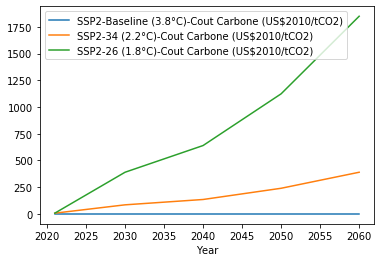

In [438]:
carbon_df.plot()

# Transition risk  - From carbon tax to asset devaluation

### Need to compute carbon footprint each year : 

* Sum of carbon footprint on each country of activity : i = 0; one company only

$CC(k,t) = \sum_{j\in M} Scope_1(j,t)\times CP(j,k,t) $

k is scenario chosen ; j a region ; t is time

* To simplify our study - Only consider one country ? 

### Shock to EBITDA 

* Firm is equal to a given multiplier times EBITDA 

$\zeta(k,t) = \frac{CC(k,t)}{EBITDA(k=0,t=0)}$

### Link with initial firm value 

$V(k,t) = (1-\zeta(k,t))\times V(k=0,t=0) $

## Ebitda & Firm value

<img src=https://chinookadvisors.com/wp-content/uploads/2020/07/figure.png style="width:110px;"/>

## What amount of carbon dioxyde ? British Petroleum

<img src = https://safety4sea.com/wp-content/uploads/2019/02/bp-co2-in-2040-1024x517.png style="width:400px;"/>

In [451]:
### Create scenario
def create_scenarios(carbon_dict,T):
    ## Create a scenario based on dict : {initial_value1:[growth],initial_value2:[growth]}
    carbon_scenarios = [] # Stores all carbon scenario 
    for (i,base_value) in enumerate(carbon_dict):
        for (j,growth_rate) in enumerate(carbon_dict[base_value]):
            scenario = [base_value*(1+growth_rate)**t for t in range(T)]
            carbon_scenarios.append(scenario)
    return(carbon_scenarios)

### Plot scenarios
def plot_scenarios(carbon_scenarios,T,prefix='Carbon tax',ylabel='Carbon tax [USD]'):
    time  = [i+2021 for i in range(T)]
    for (i,scenario) in enumerate(carbon_scenarios):
        plt.plot(time,scenario,label=f"{prefix} {i+1}")
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [452]:
bp_dict = {35:[0.01,-0.03,-0.079]}

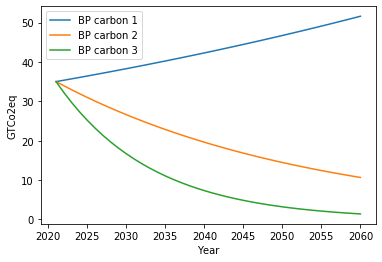

In [455]:
T = 40 # Set horizon
bp_carbon_scenarios = create_scenarios(bp_dict,T=40)
plot_scenarios(bp_carbon_scenarios,T=40,prefix='BP carbon',ylabel='GTCo2eq')

## Compute each carbon cost for each scenario

In [465]:
def carbon_cost(carbon_scenarios,firm_scenario):
    """Carbon scenarios : liste des prix du carbone sur la durée de temps considérée
       Firm scenario : Trajectoire de décarbonation envisagé par l'entreprise
       
    Output : array avec le coût de chaque possibilité"""
    results = {}
    for (i,carbon_tax) in enumerate(carbon_scenarios):
        ## Loop on each carbon tax & compute a price 
        for (j,scenario) in enumerate(firm_scenario):
            cost = []
            for (carbon_price,scope) in zip(carbon_tax,scenario):
                cost.append(carbon_price*scope)
            results[f'scenario_{i}_{j}'] = cost # scenario i (which carbon tax) ; j (which alignement scenario)
    return(results)

In [467]:
### Use carbon df & firm scenarios
# create array with carbon df
array_carbon_df = [carbon_df[col].tolist() for col in carbon_df.columns]
results = carbon_cost(array_carbon_df,bp_carbon_scenarios)

In [481]:
df = pd.DataFrame(results)
df.index = carbon_df.index

In [482]:
df.head(5)

,scenario_0_0,scenario_0_1,scenario_0_2,scenario_1_0,scenario_1_1,scenario_1_2,scenario_2_0,scenario_2_1,scenario_2_2
Year,,,,,,,,,
2021,0.0,0.0,0.0,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
2022,0.0,0.0,0.0,553.816667,531.883333,505.015000,1751.788889,1682.411111,1597.423333
2023,0.0,0.0,0.0,868.785167,801.333167,722.418585,3288.689056,3033.357056,2734.634735
2024,0.0,0.0,0.0,1189.997655,1054.137315,902.320605,4856.152047,4301.732073,3682.197216
2025,0.0,0.0,0.0,1517.547515,1291.052015,1049.289491,6454.635429,5491.274569,4462.977970


##### Pour chaque scénario on calcule le coût de carbone associé

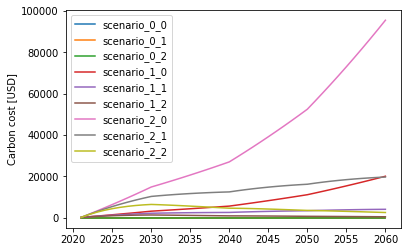

In [476]:
time  = [i+2021 for i in range(T)]
for col in df.columns:
    plt.plot(time,df[col],label=col)
plt.ylabel('Carbon cost [USD]')
plt.legend()
plt.show() # Carbon price

### Compute zeta & PD 

In [634]:
import math
def compute_pd(carbon_cost,V,D,multiple=6,T=1,PD0=0.02,sigma_v=0.5,r=0):
    # list of zeta, compute evolution of PD
    PD = [PD0]
    for i in range(1,len(carbon_cost)):
        zeta = carbon_cost[i]/(V/multiple)
        if zeta > 1 :
            #### Cannot handle carbon tax : 
            PD.append(1)
        # Compute pd ième 
        else:
            DD = ( np.log( (1-zeta)*V/D )+ (r+0.5*sigma_v**2)*T )/(sigma_v*np.sqrt(T))
            if DD > -0.5 :
                # Pas de défaut possible
                pdi = PD0
            elif math.isnan(norm.ppf(-DD)):
                pdi = 1
            else :
                pdi = norm.ppf(-DD)
            PD.append(pdi)             
    return(PD)

### Attention à choisir des valeurs pertinentes sinon pas de résultats

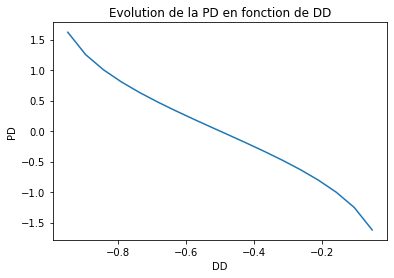

In [635]:
plt.xlabel('DD')
plt.ylabel("PD")
plt.plot(np.linspace(-1,0,20),norm.ppf(-np.linspace(-1,0,20)))
plt.title('Evolution de la PD en fonction de DD')
plt.show()

In [640]:
V = 8000
D = 2000

### Quelques visualisations

In [650]:
prob_defaults = []
time = df.index.tolist()
for (i,col) in enumerate(df.columns) : 
    prob_defaults.append(compute_pd(df.iloc[:,i].values,V,D,multiple=6,T=1,PD0=0.02,sigma_v=0.5,r=0))

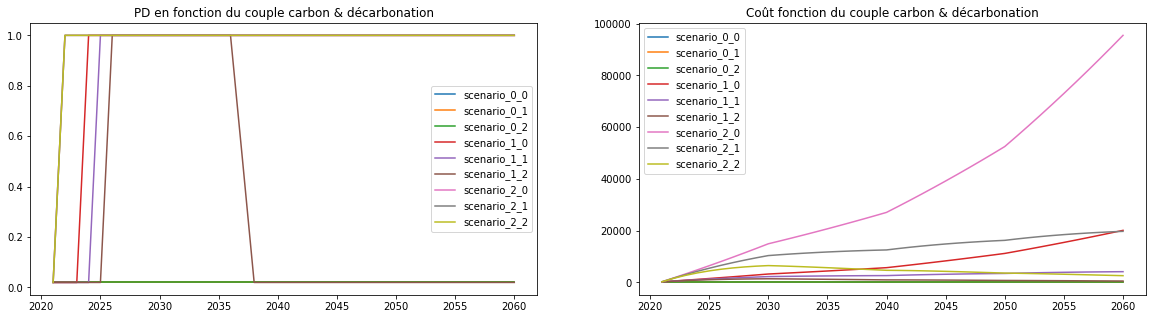

In [662]:
plt.figure(figsize=(20,5))
plt.subplot(121)
for i,pd in enumerate(prob_defaults) :
    plt.plot(time,pd,label=df.columns[i])
plt.legend()
plt.title("PD en fonction du couple carbon & décarbonation")
plt.subplot(122)
for col in df.columns:
    plt.plot(time,df[col],label = col)
plt.title("Coût fonction du couple carbon & décarbonation")
plt.legend()
plt.show()

## Climate risk


Sur l'horizon des 40 années, une catastrophe arrive 

* L'année t est choisie avec une loi de poisson ? ou random au bout 2035-2060.

#### Amplitude dépend du scénario de transition : 

* 20% de la valeur des actifs si prix carbon bas (BaU)
* 10% de la valeur des assets si prix carbon medium
* 4% de la valeur des assets si prix carbon haut


In [680]:
np.random.randint(2035,2060)

2036

In [ ]:
def compute_poisson_loss(V,scenario):
    year = np.random.randint(2035,2060)
    """S"""
    losses_dic = {1:}

In [670]:
s = np.random.poisson(V,1)

In [671]:
s

array([8043])